In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Linux

def creacion_dataset(folder):
    
    imagenes = []
    etiquetas = []
    etiquetas_clases = os.listdir(folder)
    
    for etiqueta in etiquetas_clases:
        
        class_path = os.path.join(folder, etiqueta)
        if not os.path.isdir(class_path):
            continue
        
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (64, 64)) # Redimensionamos la imagen
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convertimos a escala de grises
                img = img.astype("float32") / 255.0 # "Normalizamos" el arreglo dividiendo entre 255
                imagenes.append(img.flatten())
                etiquetas.append(etiqueta)
                
    return np.array(imagenes), np.array(etiquetas)

X, Y = creacion_dataset('/home/javia/Samsung/PF/Data_set')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f'Tamaño de train: {len(X_train)}, Tamaño de test: {len(X_test)}')

Tamaño de train: 12000, Tamaño de test: 3000


In [4]:
svm_model = SVC()

param_grid = {'C': [0.1, 1, 10, 100], 
              "kernel":["linear", "rbf", "poly"],
              'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10, 100]}

# Usar GridSearchCV para encontrar el mejor valor de C
grid_search = GridSearchCV(svm_model, param_grid, cv=5, verbose=2, n_jobs=4)  # 5-fold cross-validation
grid_search.fit(X_train, Y_train)

# Ver el mejor valor de C
print(f'Best C: {grid_search.best_params_["C"]}')
print(f'Best kernel: {grid_search.best_params_["kernel"]}')
print(f'Best gamma: {grid_search.best_params_["gamma"]}')

# Evaluar el modelo con el mejor C
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f'Precisión con el mejor C, kernel y gamma: {accuracy:.2f}')

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 9.9min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 9.9min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 9.9min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 9.9min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=10.1min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=10.5min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=10.6min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=10.6min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=10.7min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=10.7min
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=12.3min
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=12.3min
[CV] END ...................

In [6]:
mejor_svm = SVC(kernel = "rbf", C=10, gamma=0.01)
mejor_svm.fit(X_train, Y_train)

y_pred = mejor_svm.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f'Precisión con el mejor C y kernel: {accuracy:.2f}')

Precisión con el mejor C y kernel: 0.87


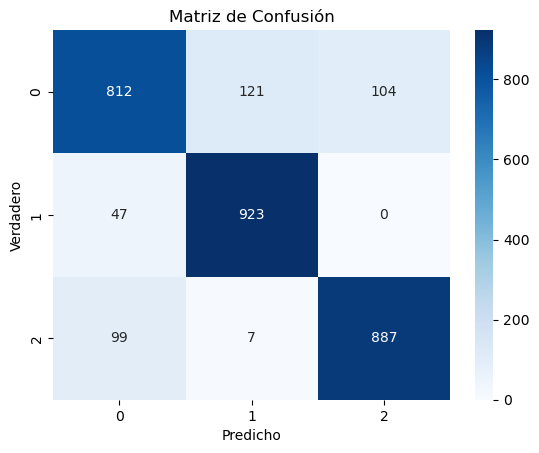

In [7]:
# Crear la matriz de confusión
cm = confusion_matrix(Y_test, y_pred)

# Visualizarla con seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicho")
plt.ylabel("Verdadero")
plt.title("Matriz de Confusión")
plt.show()

In [8]:
print(classification_report(Y_test, y_pred))

                     precision    recall  f1-score   support

lung_adenocarcinoma       0.85      0.78      0.81      1037
        lung_begino       0.88      0.95      0.91       970
     lung_carcinoma       0.90      0.89      0.89       993

           accuracy                           0.87      3000
          macro avg       0.87      0.88      0.87      3000
       weighted avg       0.87      0.87      0.87      3000

